In [1]:
import math
import numpy as np

# importing Qiskit
import qiskit as q
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# import basic plot tools
from qiskit.visualization import plot_histogram

qasm_sim = q.Aer.get_backend('qasm_simulator')
statevec_sim = q.Aer.get_backend("statevector_simulator")

In [2]:
balanced_oracle = QuantumCircuit(2)
balanced_oracle.barrier()
balanced_oracle.cx(0, 1)
balanced_oracle.draw("mpl")

<Figure size 287.294x200.667 with 1 Axes>

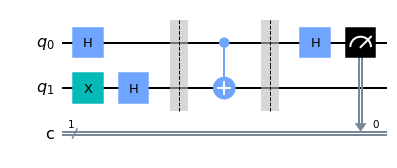

In [3]:
circuit = QuantumCircuit(2, 1)
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.compose(balanced_oracle, inplace= True)
circuit.barrier()
circuit.h(0)
circuit.measure([0], [0])
circuit.draw("mpl")

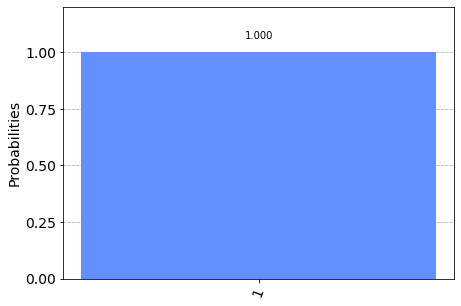

In [4]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(circuit, aer_sim)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)